<h1>STOCK PRICE PREDICTION USING MACHINE LEARNING</h1>

In [494]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [495]:
#Download data from yahoo finance and store as csv
stock_name = input('Enter stock')
stock_name = stock_name.upper()
stock = yf.download(f"{stock_name}.NS")
print(stock)
stock.to_csv(f'{stock_name}.csv')

Enter stock reliance


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
1996-01-01     5.674155     5.683807     5.616242     5.653472   104121369
1996-01-02     5.630030     5.687944     5.588663     5.660366   168743308
1996-01-03     5.672776     5.983028     5.660366     5.722416   209323879
1996-01-04     5.620377     5.636923     5.544538     5.618998   216900264
1996-01-05     5.581769     5.598315     5.533507     5.598315   166708467
...                 ...          ...          ...          ...         ...
2025-05-28  1412.900024  1422.599976  1410.699951  1420.099976     5944611
2025-05-29  1417.800049  1420.000000  1408.599976  1412.099976    13771917
2025-05-30  1420.900024  1430.599976  1409.699951  1418.000000    13788484
2025-06-02  1413.699951  1417.500000  1395.599976  1412.099976     8098668
2025-06-03  1405.500000  

In [496]:
#Show live price of the stock
ticker = yf.Ticker(f'{stock_name}.NS')
stock_live = ticker.history(period='1d')
print(stock_live)

                                  Open    High          Low   Close    Volume  \
Date                                                                            
2025-06-03 00:00:00+05:30  1422.300049  1426.5  1403.400024  1405.5  11250250   

                           Dividends  Stock Splits  
Date                                                
2025-06-03 00:00:00+05:30        0.0           0.0  


In [497]:
#Read csv as df and print
df = pd.read_csv(f'{stock_name}.csv')
print(df.head())

        Price              Close                High                Low  \
0      Ticker        RELIANCE.NS         RELIANCE.NS        RELIANCE.NS   
1        Date                NaN                 NaN                NaN   
2  1996-01-01  5.674155235290527   5.683807449889875  5.616241947694443   
3  1996-01-02  5.630029678344727   5.687943695110073  5.588663207536571   
4  1996-01-03  5.672776222229004  5.9830275344864585  5.660366390731164   

                Open       Volume  
0        RELIANCE.NS  RELIANCE.NS  
1                NaN          NaN  
2  5.653472181378204    104121369  
3  5.660366047904636    168743308  
4  5.722415916541127    209323879  


In [498]:
#Drop the unnecessary headers and reset index
df = df.drop([0,1]).reset_index(drop=True)
print(df.head())

        Price               Close                High                Low  \
0  1996-01-01   5.674155235290527   5.683807449889875  5.616241947694443   
1  1996-01-02   5.630029678344727   5.687943695110073  5.588663207536571   
2  1996-01-03   5.672776222229004  5.9830275344864585  5.660366390731164   
3  1996-01-04  5.6203765869140625   5.636923393644647  5.544537516466407   
4  1996-01-05    5.58176851272583  5.5983153217485055  5.533507446810612   

                 Open     Volume  
0   5.653472181378204  104121369  
1   5.660366047904636  168743308  
2   5.722415916541127  209323879  
3   5.618997962593694  216900264  
4  5.5983153217485055  166708467  


In [499]:
#Rename Price header to Date
df = df.rename(columns={'Price':'Date'})
df

,Date,Close,High,Low,Open,Volume
0,1996-01-01,5.674155235290527,5.683807449889875,5.616241947694443,5.653472181378204,104121369
1,1996-01-02,5.630029678344727,5.687943695110073,5.588663207536571,5.660366047904636,168743308
2,1996-01-03,5.672776222229004,5.9830275344864585,5.660366390731164,5.722415916541127,209323879
3,1996-01-04,5.6203765869140625,5.636923393644647,5.544537516466407,5.618997962593694,216900264
4,1996-01-05,5.58176851272583,5.5983153217485055,5.533507446810612,5.5983153217485055,166708467
...,...,...,...,...,...,...
7380,2025-05-28,1412.9000244140625,1422.5999755859375,1410.699951171875,1420.0999755859375,5944611
7381,2025-05-29,1417.800048828125,1420.0,1408.5999755859375,1412.0999755859375,13771917
7382,2025-05-30,1420.9000244140625,1430.5999755859375,1409.699951171875,1418.0,13788484
7383,2025-06-02,1413.699951171875,1417.5,1395.5999755859375,1412.0999755859375,8098668


In [500]:
#Convert object numeric values
print(df.dtypes)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
cols_convert = ['Open', 'High', 'Low', 'Close', 'Volume']
df[cols_convert] = df[cols_convert].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object
Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object


<Axes: xlabel='Dtae', ylabel='Price'>

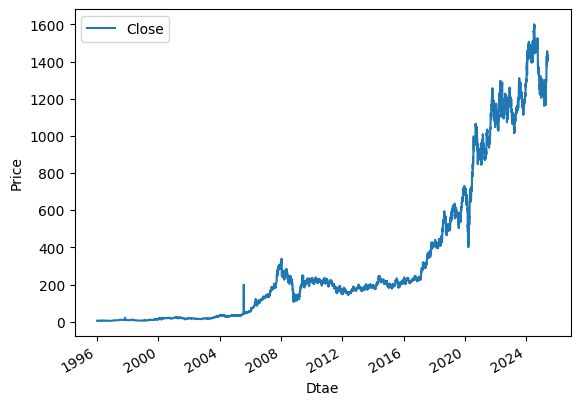

In [501]:
#Plot the date and price in line graph
df.plot.line(x='Date',y='Close', xlabel='Dtae', ylabel='Price')

In [502]:
print(df)

           Date        Close         High          Low         Open     Volume
0    1996-01-01     5.674155     5.683807     5.616242     5.653472  104121369
1    1996-01-02     5.630030     5.687944     5.588663     5.660366  168743308
2    1996-01-03     5.672776     5.983028     5.660366     5.722416  209323879
3    1996-01-04     5.620377     5.636923     5.544538     5.618998  216900264
4    1996-01-05     5.581769     5.598315     5.533507     5.598315  166708467
...         ...          ...          ...          ...          ...        ...
7380 2025-05-28  1412.900024  1422.599976  1410.699951  1420.099976    5944611
7381 2025-05-29  1417.800049  1420.000000  1408.599976  1412.099976   13771917
7382 2025-05-30  1420.900024  1430.599976  1409.699951  1418.000000   13788484
7383 2025-06-02  1413.699951  1417.500000  1395.599976  1412.099976    8098668
7384 2025-06-03  1405.500000  1426.500000  1403.400024  1422.300049   11250250

[7385 rows x 6 columns]


In [503]:
df.set_index('Date', inplace=True)
df

,Close,High,Low,Open,Volume
Date,,,,,
1996-01-01,5.674155,5.683807,5.616242,5.653472,104121369
1996-01-02,5.630030,5.687944,5.588663,5.660366,168743308
1996-01-03,5.672776,5.983028,5.660366,5.722416,209323879
1996-01-04,5.620377,5.636923,5.544538,5.618998,216900264
1996-01-05,5.581769,5.598315,5.533507,5.598315,166708467
...,...,...,...,...,...
2025-05-28,1412.900024,1422.599976,1410.699951,1420.099976,5944611
2025-05-29,1417.800049,1420.000000,1408.599976,1412.099976,13771917
2025-05-30,1420.900024,1430.599976,1409.699951,1418.000000,13788484


In [504]:
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
df = df.loc["2000-01-01":].copy()
df

,Close,High,Low,Open,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03,14.509665,14.509665,13.691081,13.691081,62409578,15.671246,1
2000-01-04,15.671246,15.671246,14.486606,14.895897,132872110,16.285185,1
2000-01-05,16.285185,16.596477,14.795018,14.795018,375789847,16.968290,1
2000-01-06,16.968290,17.334348,16.659882,16.659882,219621124,18.132753,1
2000-01-07,18.132753,18.325871,16.890468,17.005762,278281260,17.783993,0
...,...,...,...,...,...,...,...
2025-05-28,1412.900024,1422.599976,1410.699951,1420.099976,5944611,1417.800049,1
2025-05-29,1417.800049,1420.000000,1408.599976,1412.099976,13771917,1420.900024,1
2025-05-30,1420.900024,1430.599976,1409.699951,1418.000000,13788484,1413.699951,0


<h2>RandomForestClassifier</h2>

In [505]:
from sklearn.ensemble import RandomForestClassifier

In [506]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [507]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [508]:
preds = pd.Series(preds, index = test.index)
print(preds)
precision_score(test['Target'],preds)

Date
2025-01-07    0
2025-01-08    1
2025-01-09    0
2025-01-10    0
2025-01-13    1
             ..
2025-05-28    1
2025-05-29    1
2025-05-30    1
2025-06-02    1
2025-06-03    1
Length: 100, dtype: int64


0.5357142857142857

<h2>Make the model Better by back testing</h2>

In [509]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [510]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [511]:
predictions = backtest(df,model,predictors)

In [512]:
predictions['Predictions'].value_counts()

Predictions
0    2137
1    1703
Name: count, dtype: int64

In [513]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5143863769817968

In [514]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.507552
0    0.492448
Name: count, dtype: float64

<h2>Add More Predictors</h2>

In [515]:
horizons = [2,5,60,250,1000]
new_predictors = []
for i in horizons:
    rolling_averages = df.rolling(i).mean()

    ratio_column = f'Close_Ratio_{i}'
    df[ratio_column] = df['Close'] / rolling_averages['Close']
    trend_column = f'Trend_{i}'
    df[trend_column] = df.shift(1).rolling(i).sum()['Target']
    new_predictors += [ratio_column, trend_column]    

In [516]:
df = df.dropna()
df

,Close,High,Low,Open,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-11-04,30.659733,31.564242,30.388381,31.320960,110392949,30.478838,0,0.993331,1.0,1.013193,4.0,1.142585,36.0,1.493217,137.0,1.601207,496.0
2003-11-05,30.478838,30.821929,29.973561,30.379030,91124985,30.743950,1,0.997041,0.0,1.000532,3.0,1.130253,35.0,1.480507,137.0,1.590530,495.0
2003-11-06,30.743950,31.283538,30.510029,30.690930,134300335,30.076490,0,1.004330,1.0,1.002747,3.0,1.134214,36.0,1.489425,137.0,1.603155,495.0
2003-11-07,30.076490,30.996593,29.923659,30.787622,73031669,30.126392,1,0.989026,1.0,0.982696,2.0,1.104356,36.0,1.453444,136.0,1.567279,494.0
2003-11-10,30.126392,31.813769,29.387188,31.813769,55228187,29.982920,0,1.000829,1.0,0.990443,2.0,1.101073,36.0,1.452395,136.0,1.568899,494.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-27,1422.099976,1437.000000,1413.900024,1426.099976,12640414,1412.900024,0,0.995555,1.0,0.998343,3.0,1.090688,32.0,1.042918,129.0,1.162856,524.0
2025-05-28,1412.900024,1422.599976,1410.699951,1420.099976,5944611,1417.800049,1,0.996755,0.0,0.994160,2.0,1.080892,32.0,1.036376,129.0,1.154836,523.0
2025-05-29,1417.800049,1420.000000,1408.599976,1412.099976,13771917,1420.900024,1,1.001731,1.0,0.996430,3.0,1.081691,33.0,1.040118,130.0,1.158329,524.0


In [517]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [518]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [519]:
predictions = backtest(df,model,new_predictors)

In [520]:
predictions['Predictions'].value_counts()

Predictions
0.0    2662
1.0     177
Name: count, dtype: int64

In [521]:
precision_score(predictions["Target"], predictions["Predictions"])

0.559322033898305

In [522]:
print(predictions)

            Target  Predictions
Date                           
2013-11-26       0          0.0
2013-11-27       1          0.0
2013-11-28       1          0.0
2013-11-29       1          0.0
2013-12-02       1          0.0
...            ...          ...
2025-05-27       0          0.0
2025-05-28       1          0.0
2025-05-29       1          0.0
2025-05-30       0          0.0
2025-06-02       0          0.0

[2839 rows x 2 columns]


In [527]:
predictions.to_csv(f'{stock_name}_predicted.csv')